In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the path to your "train" folder containing subfolders 0 to 6
data_path = 'C:/Users/Hp/Documents/Downloads/archive/data/train/'

# List all subfolders (classes)
class_folders = [str(i) for i in range(7)]

# Initialize an empty DataFrame to store the training data
train_data = pd.DataFrame(columns=['emotion'])  # Assuming your DataFrame has an "emotion" column

# Load data from each class folder
for class_folder in class_folders:
    class_path = os.path.join(data_path, class_folder)
    
    # Read the files in the class folder (assuming they are images)
    class_files = os.listdir(class_path)
    
    # Create a DataFrame for this class and set the "emotion" column
    class_df = pd.DataFrame({'emotion': [int(class_folder)] * len(class_files)})
    
    # Append the class data to the training data
    train_data = train_data.append(class_df, ignore_index=True)

# Your emotion labels (if you want to customize them)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe, df, title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))
setup_axe(axes, train_data, 'Training Data')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_15804\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(class_df, ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_15804\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(class_df, ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_15804\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(class_df, ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_15804\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#Label extraction on training data
import os
labels = []
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/0'):
    labels.append(0)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/1'):
    labels.append(1)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/2'):
    labels.append(2)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/3'):
    labels.append(3)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/4'):
    labels.append(4)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/5'):
    labels.append(5)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/6'):
    labels.append(6)
   

In [4]:
#feature extraction on training data
import cv2
#loc1 = '#feature extraction on training data
import cv2
loc1 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/0'
loc2 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/1'
loc3 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/2'
loc4 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/3'
loc5 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/4'
loc6 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/5'
loc7 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/6'
features = []
from tqdm import tqdm
for i in tqdm(os.listdir(loc1)):
    features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 4965/4965 [00:06<00:00, 815.27it/s] 


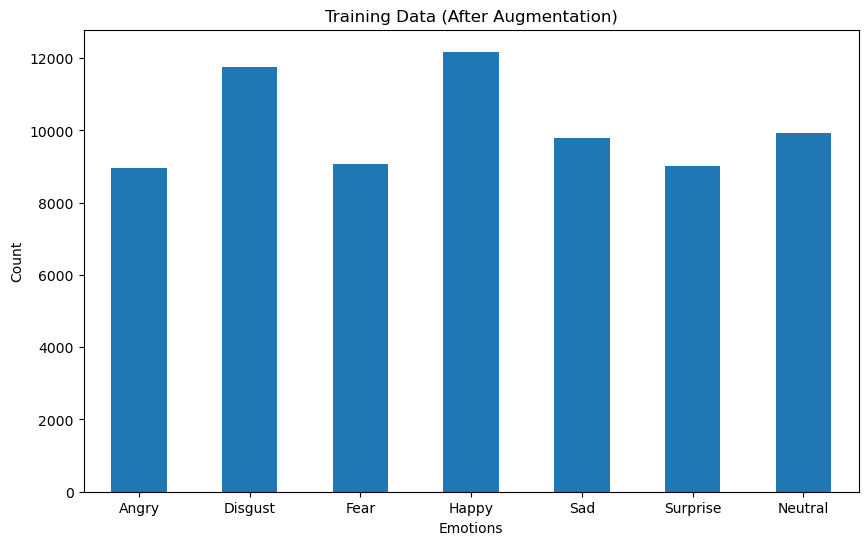

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator from TensorFlow/Keras
data_path = 'C:/Users/Hp/Documents/Downloads/archive/data/train/'

# List all subfolders (classes)
class_folders = [str(i) for i in range(7)]

# Initialize a dictionary to store image counts for each class
class_counts = {}

# Calculate the maximum count of images in a class
max_class_count = 0

# Load data and count images for each class
for class_folder in class_folders:
    class_path = os.path.join(data_path, class_folder)
    
    # Read the files in the class folder (assuming they are images)
    class_files = os.listdir(class_path)
    
    # Store the count of images for this class
    class_count = len(class_files)
    class_counts[class_folder] = class_count
    
    # Update the maximum class count if needed
    if class_count > max_class_count:
        max_class_count = class_count

# List of class folders that you want to augment
classes_to_augment = [1,5]  # Replace with the class indices you want to augment

# Augmentation parameters
augmented_data = []

# Define the rotation angles you want
rotation_angles = [30, 60, 90, 120, 150]

datagen = ImageDataGenerator(
    rotation_range=0,  # Set initial rotation range to 0 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' #Specifies the method used for filling in newly created pixels. In this case, 'nearest' is used,
)

for class_folder, class_count in class_counts.items():
    # Initialize class_images
    class_path = os.path.join(data_path, class_folder)
    class_images = [cv2.imread(os.path.join(class_path, image_file), 0) for image_file in os.listdir(class_path)]

    if int(class_folder) in classes_to_augment and class_count < max_class_count:
        # Augment the data for this class to reach the maximum count
        augment_count = max_class_count - class_count
        for i in range(augment_count):
            # Randomly choose one of the rotation angles
            random_rotation_angle = np.random.choice(rotation_angles)
            datagen.rotation_range = random_rotation_angle

            augmented_images = datagen.flow(np.array(class_images)[:, :, :, np.newaxis], batch_size=1)  # Add an extra dimension for channels
            augmented_image = augmented_images.next()
            augmented_data.append((int(class_folder), augmented_image[0]))
    else:
        # For classes not in classes_to_augment, add the original data
        augmented_data.extend([(int(class_folder), image) for image in class_images])

# Combine the original and augmented data
original_data = [(int(class_folder), image) for class_folder, class_count in class_counts.items() for image in class_images]
combined_data = original_data + augmented_data

# Create a DataFrame
train_data = pd.DataFrame(combined_data, columns=['emotion', 'image'])

#emotion labels 
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe, df, title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))
setup_axe(axes, train_data, 'Training Data (After Augmentation)')
plt.show()


In [7]:
#Label extraction on testing data
import os
labels_test = []
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/0'): #it returns a list containing the name of the entries
    labels_test.append(0)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/1'):
    labels_test.append(1)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/2'):
    labels_test.append(2)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/3'):
    labels_test.append(3)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/4'):
    labels_test.append(4)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/5'):
    labels_test.append(5)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/6'):
    labels_test.append(6)

In [8]:
#feature extraction on testing data
import cv2
loc1 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/0'
loc2 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/1'
loc3 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/2'
loc4 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/3'
loc5 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/4'
loc6 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/5'
loc7 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/6'
test_features = []
from tqdm import tqdm
for i in tqdm(os.listdir(loc1)):
    test_features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    test_features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    test_features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    test_features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    test_features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    test_features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    test_features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 626/626 [00:00<00:00, 661.46it/s] 


In [9]:
import pandas as pd
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [10]:
train_data['emotion'] = labels
train_data['pixel_values'] = features
test_data['emotion'] = labels_test
test_data['pixel_values'] = test_features

In [11]:
train_data.head()

emotion                                       pixel_values
0        0  [[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ...
1        0  [[151, 150, 147, 155, 148, 133, 111, 140, 170,...
2        0  [[30, 24, 21, 23, 25, 25, 49, 67, 84, 103, 120...
3        0  [[32, 25, 19, 55, 46, 35, 34, 48, 92, 101, 33,...
4        0  [[223, 218, 199, 191, 202, 205, 194, 133, 103,...

In [12]:
test_data.head()

emotion                                       pixel_values
0        0  [[170, 118, 101, 88, 88, 75, 78, 82, 66, 74, 6...
1        0  [[138, 142, 66, 80, 87, 92, 97, 99, 88, 73, 72...
2        0  [[245, 245, 239, 122, 144, 101, 33, 37, 84, 13...
3        0  [[215, 218, 222, 220, 221, 226, 218, 215, 216,...
4        0  [[58, 52, 55, 62, 59, 42, 40, 45, 43, 39, 40, ...

In [13]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe, df, title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)

import matplotlib.pyplot as plt   
fig, axes = plt.subplots(1, 1, figsize=(10, 8))  # Removed the second subplot
setup_axe(axes, test_data, 'test')  # Removed the setup for train_data
plt.show()


In [14]:
import numpy as np
from tensorflow.keras.utils import to_categorical  # Import to_categorical from tensorflow.keras.utils

features = np.array(features).reshape(-1, 48, 48, 1)
test_features = np.array(test_features).reshape(-1, 48, 48, 1)

features = features / 255
test_features = test_features / 255

labels = to_categorical(labels)  # Use to_categorical from tensorflow.keras.utils
labels_test = to_categorical(labels_test)


In [15]:
print('Training features shape ',features.shape)
print('Training labels shape',labels.shape)
print('Testing features shape ',test_features.shape)
print('Testing labels shape',labels_test.shape)

Training features shape  (28709, 48, 48, 1)
Training labels shape (28709, 7)
Testing features shape  (3589, 48, 48, 1)
Testing labels shape (3589, 7)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from sklearn.metrics import accuracy_score



In [17]:
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))
  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [19]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

In [20]:
history = model.fit(x=features, 
            y=labels, 
            batch_size=64,
            steps_per_epoch=len(features) / 64,
            epochs=30, 
            verbose=1, 
            callbacks = [es],
            validation_data=(test_features,labels_test),
            shuffle=True)

# Save the trained model to a file
model.save('augmented_almost_labelfer2013_emotion_model.h5')



Epoch 1/30
448/448 [==============================] - 1402s 3s/step - loss: 1.6471 - accuracy: 0.3623 - val_loss: 1.7408 - val_accuracy: 0.3402
Epoch 2/30
448/448 [==============================] - 1338s 3s/step - loss: 1.3054 - accuracy: 0.5016 - val_loss: 1.2899 - val_accuracy: 0.5121
Epoch 3/30
448/448 [==============================] - 1407s 3s/step - loss: 1.1296 - accuracy: 0.5729 - val_loss: 1.2722 - val_accuracy: 0.5001
Epoch 4/30
448/448 [==============================] - 1310s 3s/step - loss: 1.0034 - accuracy: 0.6264 - val_loss: 1.1816 - val_accuracy: 0.5511
Epoch 5/30
448/448 [==============================] - 1313s 3s/step - loss: 0.8892 - accuracy: 0.6716 - val_loss: 1.1492 - val_accuracy: 0.5776
Epoch 6/30
448/448 [==============================] - 1309s 3s/step - loss: 0.7446 - accuracy: 0.7268 - val_loss: 1.2623 - val_accuracy: 0.5684
Epoch 7/30
448/448 [==============================] - 1311s 3s/step - loss: 0.5864 - accuracy: 0.7878 - val_loss: 1.2846 - val_accuracy:

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


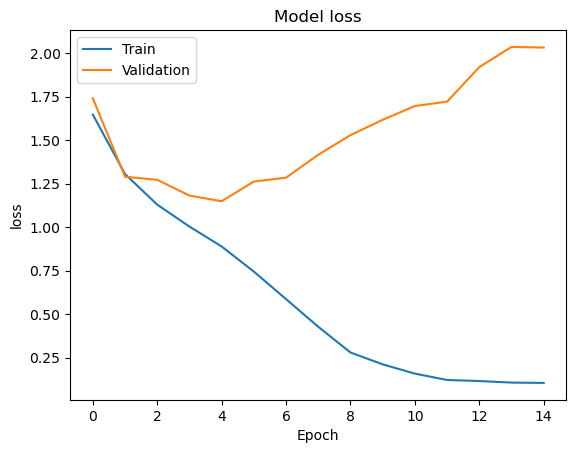

In [22]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [23]:
test_true = np.argmax(labels_test, axis=1)
test_pred = np.argmax(model.predict(test_features), axis=1)
print("CNN Model Accuracy on testing data: {:.4f}".format(accuracy_score(test_true, test_pred)))

113/113 [==============================] - 51s 386ms/step
CNN Model Accuracy on testing data: 0.5776


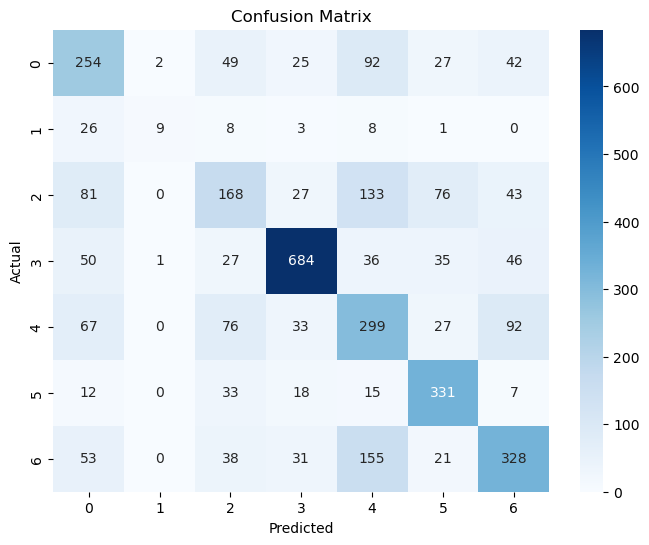

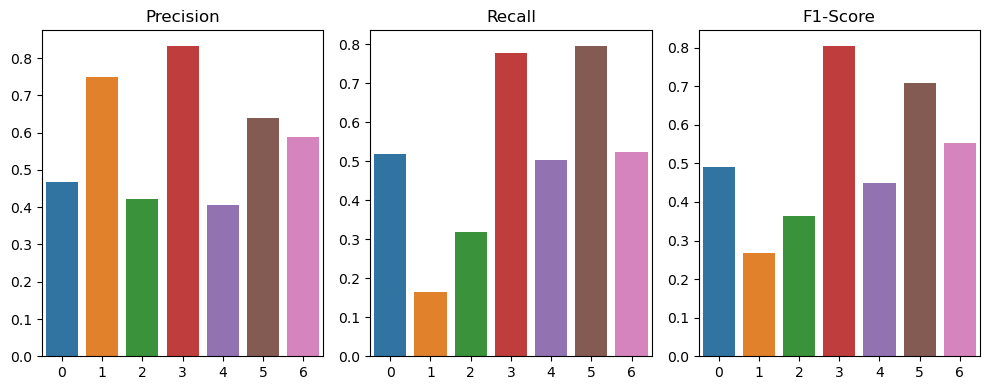

In [59]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Predicted values
y_pred = test_pred
# Actual values
y_act = test_true

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_act, y_pred, labels=[0, 1, 2, 3, 4, 5, 6])

# Define the class labels (0, 1, 2, 3, 4, 5, 6 in your case)
class_labels = [0, 1, 2, 3, 4, 5, 6]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
classification_report = metrics.classification_report(y_act, y_pred, labels=[0, 1, 2, 3, 4, 5, 6], output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [classification_report[str(label)]['precision'] for label in class_labels]
recall = [classification_report[str(label)]['recall'] for label in class_labels]
f1_score = [classification_report[str(label)]['f1-score'] for label in class_labels]

# Create bar charts for precision, recall, and F1-score
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=class_labels, y=precision)
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x=class_labels, y=recall)
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x=class_labels, y=f1_score)
plt.title('F1-Score')

plt.tight_layout()
plt.show()


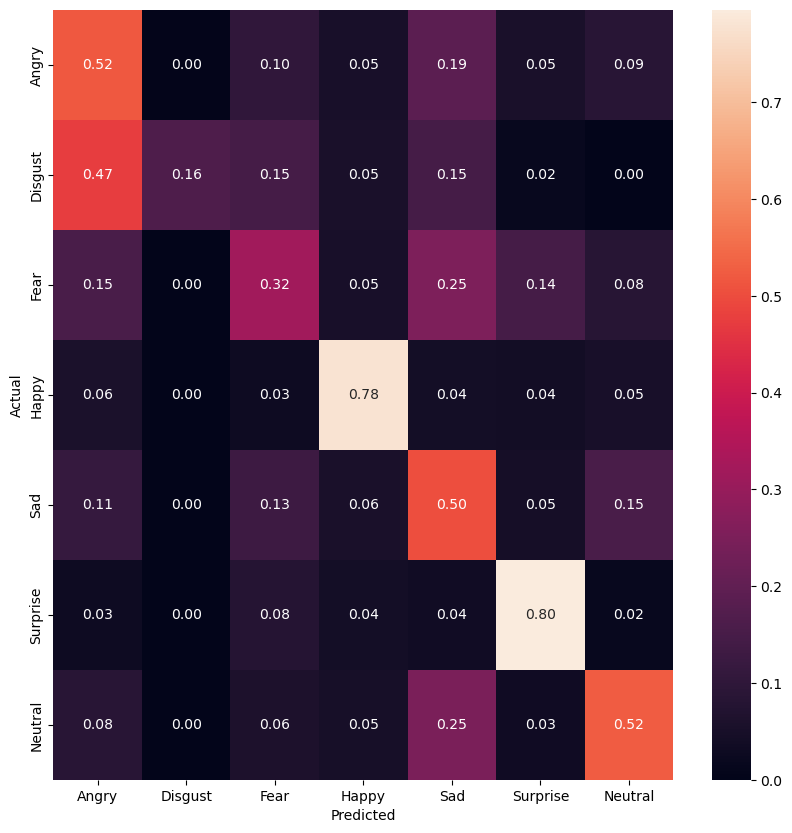

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_act, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [65]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [66]:
import matplotlib.pyplot as plt
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

In [67]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
def predict_image(pic):
    img = image.load_img(pic, grayscale=True, target_size=(48, 48))
    show_img=image.load_img(pic, grayscale=False, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = model.predict(x)
    
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    plt.gray()
    plt.imshow(show_img)
    plt.show()

    m=0.000000000000000000001
    a=custom[0]
    for i in range(0,len(a)):
        if a[i]>m:
            m=a[i]
            ind=i
        
    print('Expression Prediction:',objects[ind])

1/1 [==============================] - 4s 4s/step


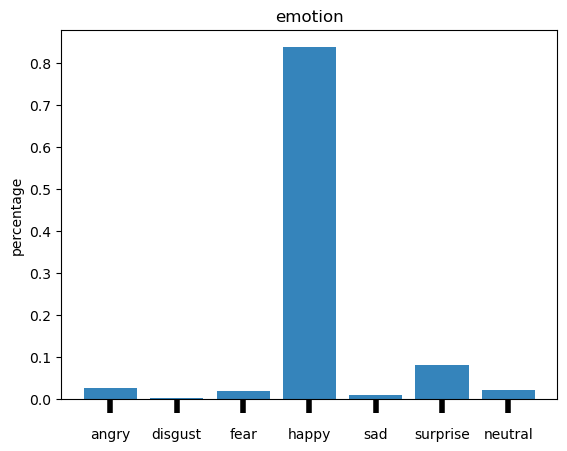

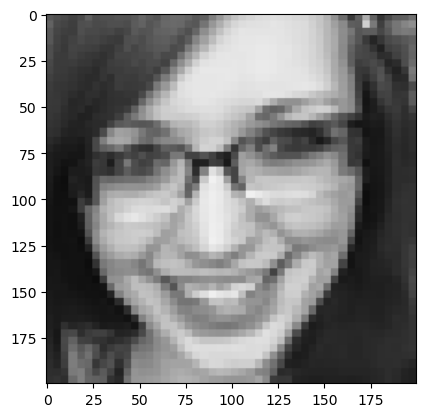

Expression Prediction: happy


In [68]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/3/28713.png')

1/1 [==============================] - 4s 4s/step


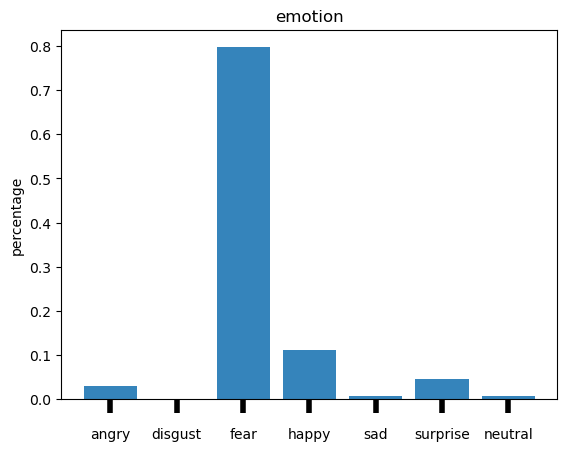

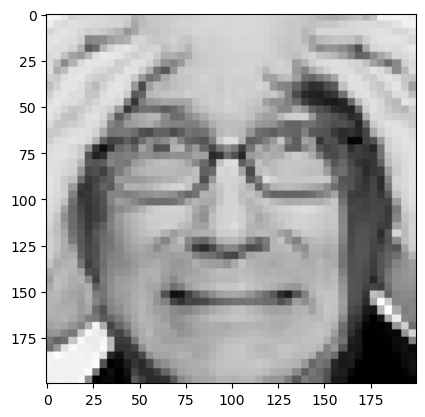

Expression Prediction: fear


In [69]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/2/29026.png')

1/1 [==============================] - 2s 2s/step


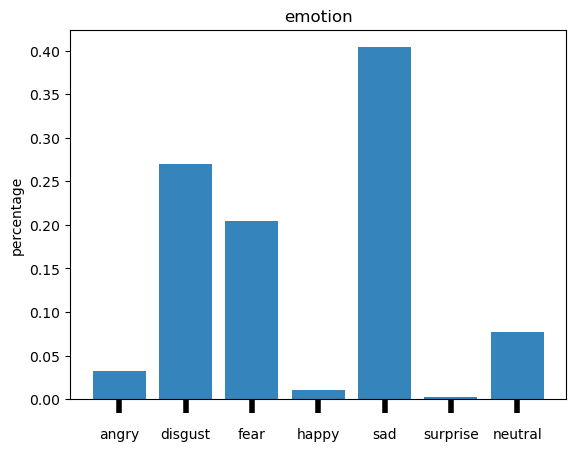

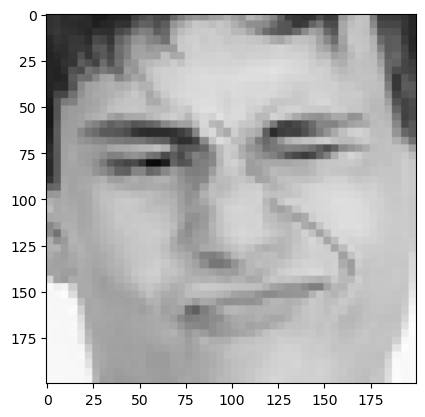

Expression Prediction: sad


In [70]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/1/28953.png')

1/1 [==============================] - 2s 2s/step


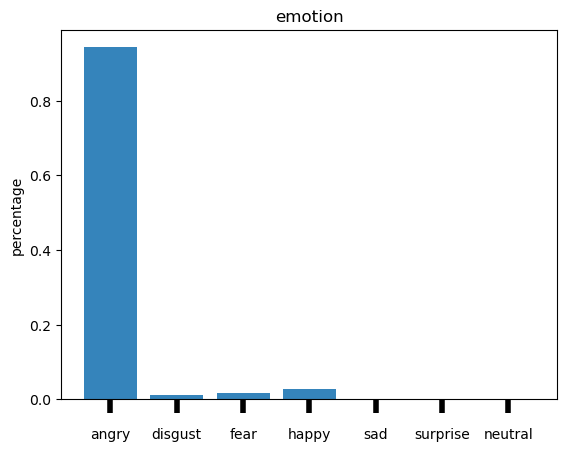

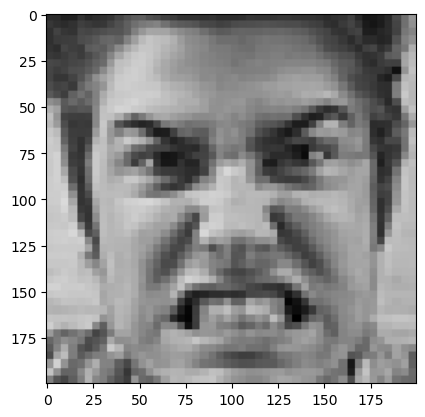

Expression Prediction: angry


In [71]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/0/28749.png')

1/1 [==============================] - 2s 2s/step


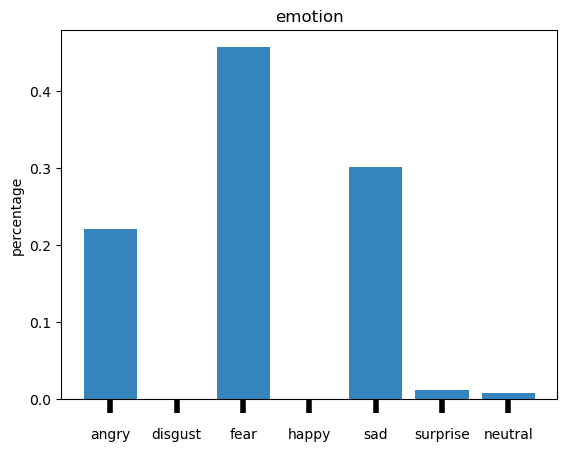

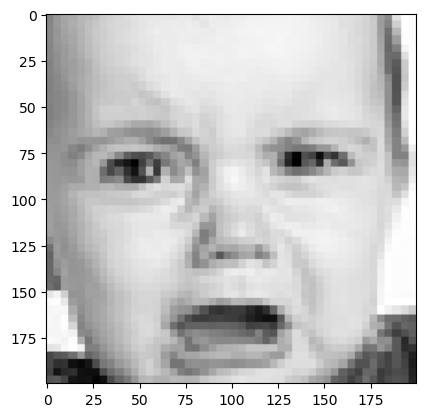

Expression Prediction: fear


In [72]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/4/28865.png')

1/1 [==============================] - 2s 2s/step


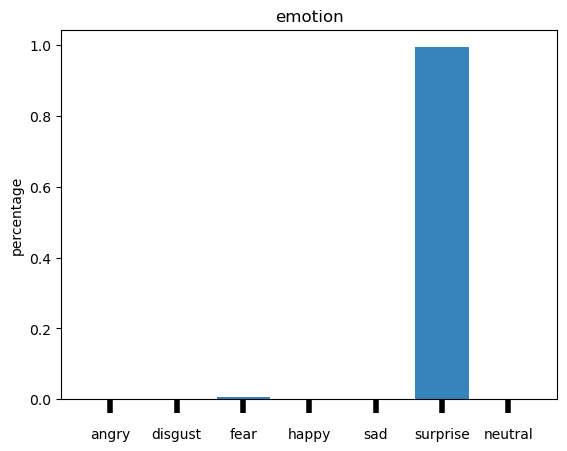

Expression Prediction: surprise


In [73]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/5/28829.png')

In [74]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/6/28769.png')

1/1 [==============================] - 2s 2s/step


Expression Prediction: neutral
